**Импорт**

In [54]:
import pandas as pd
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt


**Чтение pdf**

In [55]:
path_to_files = 'data/'


file_list = glob.glob(os.path.join(path_to_files, '*.txt'))
data = []
for file_path in file_list:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
    document_id = os.path.basename(file_path).replace('.txt', '')
    data.append({
        'document_id': document_id,
        'document_text': text,
        'entity': None,        # Пока оставляем пустыми
        'gold_answer': None    # Пока оставляем пустыми
    })
df = pd.DataFrame(data)


df.head()

,document_id,document_text,entity,gold_answer
0,brexit_ru_file_1158,ru-1158\nru\n2018-07-10\nhttps://utro.ru/polit...,None,None
1,brexit_ru_file_1155,ru-1155\nru\n2018-07-10\nhttps://afn.by/news/i...,None,None
2,brexit_ru_file_1156,ru-1156\nru\n2018-07-10\nhttps://frontnews.eu/...,None,None
3,brexit_ru_file_1161,ru-1161\nru\n2018-07-10\nhttps://news.online.u...,None,None
4,brexit_ru_file_1153,ru-1153\nru\n2018-07-10\nhttp://moldnews.md/ru...,None,None


**Создание промпта**

In [56]:
def create_prompt(row):
    text = row['document_text']
    prompt = (
        "Извлеки именованные сущности из текста ниже и укажи их тип (PER, ORG, LOC, EVT, PRO):\n\n"
        f"{text}\n\n"
        "Ответ дай в виде списка формата:\n"
        "Сущность — Тип сущности"
    )
    return prompt

**Первый пример**

In [57]:
sample_row = df.iloc[0]
example_prompt = create_prompt(sample_row)
print(example_prompt)

Извлеки именованные сущности из текста ниже и укажи их тип (PER, ORG, LOC, EVT, PRO):

ru-1158
ru
2018-07-10
https://utro.ru/politics/2018/07/10/1366719.shtml
Эксперт объяснил смысл смены главы МИД Британии

Российский сенатор Алексей Пушков уверен, что новый министр иностранных дел Великобритании по всем ключевым вопросам будет придерживаться тех же взглядов, что и Борис Джонсон. "С уходом Бориса Джонсона в британском Форин Офисе мало что изменится, особенно касательно России. Разве что прическа главы МИД Британии", – пошутил он в своем Twitter.

Мнение Пушкова о неизменности взглядов британского МИД подтвердил сам новый министр иностранных дел Джереми Хант, который в интервью телеканалу Sky News уже сообщил , что Борис Джонсон сыграл большую роль в формировании общественного мнения по "делу Скрипалей", а также назвал своего предшественника "одной из выдающихся движущих сил британской политики". С уходом Бориса Джонсона в британском Форин Офисе мало что изменится, особенно касательно 

**Запись в df**

giga_output - Ответы полученные от гигачата

gold_output - Ответы полученные от ручной разметки(тестов немного поэтому ок)

In [59]:
giga_output = """
Алексей Пушков — PER
Борис Джонсон — PER
Великобритания — LOC
Форин Офис — ORG
Джереми Хант — PER
Sky News — ORG
Россия — LOC
Международный институт гуманитарно-политических исследований — ORG
Владимир Брутер — PER
Тереза Мэй — PER
ЕС (Евросоюз) — ORG
David Davis (Дэвид Дэвис) — PER
Brexit — EVT
"""

gold_output ="""
Алексей Пушков — PER
Борис Джонсон — PER
Джереми Хант — PER
Владимир Брутер — PER
Тереза Мэй — PER
Дэвид Дэвис — PER
МИД Британии — ORG
Форин Офис — ORG
Twitter — ORG
Sky News — ORG
RT — ORG
Международный институт гуманитарно-политических исследований — ORG
ЕС (Евросоюз) — ORG
Британия — LOC
Солсбери — LOC
дело Скрипалей — EVT
Brexit — EVT
"""


def parse_gigachat_output(output):
    entities = [line.strip() for line in output.strip().split("\n") if line.strip()]
    return ', '.join(entities)

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)
print(parsed_entities)


df.at[0, 'entity'] = parsed_entities
df.at[0, 'gold_answer'] = parsed_gold

print(df.head())

Алексей Пушков — PER, Борис Джонсон — PER, Великобритания — LOC, Форин Офис — ORG, Джереми Хант — PER, Sky News — ORG, Россия — LOC, Международный институт гуманитарно-политических исследований — ORG, Владимир Брутер — PER, Тереза Мэй — PER, ЕС (Евросоюз) — ORG, David Davis (Дэвид Дэвис) — PER, Brexit — EVT
           document_id                                      document_text  \
0  brexit_ru_file_1158  ru-1158\nru\n2018-07-10\nhttps://utro.ru/polit...   
1  brexit_ru_file_1155  ru-1155\nru\n2018-07-10\nhttps://afn.by/news/i...   
2  brexit_ru_file_1156  ru-1156\nru\n2018-07-10\nhttps://frontnews.eu/...   
3  brexit_ru_file_1161  ru-1161\nru\n2018-07-10\nhttps://news.online.u...   
4  brexit_ru_file_1153  ru-1153\nru\n2018-07-10\nhttp://moldnews.md/ru...   

                                              entity  \
0  Алексей Пушков — PER, Борис Джонсон — PER, Вел...   
1                                               None   
2                                               None   
3   

**Оставшиеся запросы**

вставлял вручную в гига чат каждый

In [60]:
for i in range(1,9):
  sample_row = df.iloc[i]
  example_prompt = create_prompt(sample_row)
  print(example_prompt)
  print('-------------------------------------------')

Извлеки именованные сущности из текста ниже и укажи их тип (PER, ORG, LOC, EVT, PRO):

ru-1155
ru
2018-07-10
https://afn.by/news/i/254039
Новым главой британского МИД стал Джереми Хант

Новым министром иностранных дел Великобритании стал бывший министр здравоохранения Джереми Хант, после того как прежний глава МИД Борис Джонсон ушел в отставку в знак протеста против планов правительства сохранить тесные торговые отношения с ЕС. Пост министра здравоохранения вместо Дж.Ханта занял Мэттью Хэнкок, сообщает Даунинг-стрит. Министром по цифровым технологиям, культуре, СМИ и спорту назначен генеральный прокурор Англии и Уэльса Джереми Райт. Дж.Хант является членом Консервативной партии, он был министром здравоохранения в первом и втором кабинете Дэвида Кэмерона. Эту же должность он сохранил затем в кабинете Т.Мэй. Кроме того, 2010 по 2012 годы Дж.Хант был министром культуры, СМИ, Олимпийских игр и спорта Великобритании. В ходе референдума был сторонником сохранения членства Британии в ЕС. Б.Дж

**Остальное**

In [61]:
giga_output = """
Джереми Хант — PER
Борис Джонсон — PER
Великобритания — LOC
ЕС (Евросоюз) — ORG
Мэттью Хэнкок — PER
Англия — LOC
Уэльс — LOC
Джереми Райт — PER
Консервативная партия — ORG
Дэвид Кэмерон — PER
Т.Мэй — PER
референдум — EVT
BREXIT — EVT
Дэвид Дэвис — PER
"""

gold_output ="""
Джереми Хант — PER
Борис Джонсон — PER
Мэттью Хэнкок — PER
Джереми Райт — PER
Дэвид Кэмерон — PER
Тереза Мэй — PER
Дэвид Дэвис — PER
МИД Великобритании — ORG
Правительство Великобритании — ORG
Консервативная партия — ORG
Европейский Союз (ЕС) — ORG
Даунинг-стрит — LOC
Великобритания — LOC
Англия и Уэльс — LOC
референдум о выходе Британии из ЕС — EVT
Олимпийские игры — EVT
Brexit — PRO
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[1, 'entity'] = parsed_entities
df.at[1, 'gold_answer'] = parsed_gold

In [62]:
giga_output = """
Великобритания — LOC
Борис Джонсон — PER
Джереми Хант — PER
офис Мэй — ORG
Тереза Мэй — PER
Brexit — EVT
Дэвид Дэвис — PER
Департамент по выходу Британии из ЕС — ORG
Стив Бейкер — PER
Филип Ли — PER
Грег Хэндс — PER
Хитроу — LOC
Елизавета II — PER
Совет Европейского совета — ORG
Европейская комиссия — ORG
ЕС (Европейский союз) — ORG
Ирландия — LOC
Северная Ирландия — LOC
"""

gold_output ="""
Борис Джонсон — PER
Джереми Хант — PER
Тереза Мэй — PER
Дэвид Дэвис — PER
Стив Бейкер — PER
Филип Ли — PER
Грег Хэндс — PER
Елизавета II — PER
Офис Мэй — ORG
Департамент по выходу Британии из ЕС — ORG
Совет Европейского союза — ORG
Европейская комиссия — ORG
Руководящая группа Европейского парламента — ORG
Киев — LOC
Великобритания — LOC
Соединённое Королевство — LOC
Ирландия — LOC
Северная Ирландия — LOC
аэропорт Хитроу — LOC
референдум о выходе Великобритании из ЕС — EVT
выход Соединённого Королевства из состава Европейского Союза — EVT
публикация проекта Соглашения о выходе Великобритании из ЕС — EVT
Соглашение о выходе Великобритании из Европейского Союза — PRO
Brexit — PRO
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[2, 'entity'] = parsed_entities
df.at[2, 'gold_answer'] = parsed_gold

In [63]:
giga_output = """
Борис Джонсон — PER
Великобритания — LOC
МИД — ORG
Тереза Мэй — PER
ЕС (Европейский союз) — ORG
Brexit — EVT
"""

gold_output ="""
Борис Джонсон — PER
Тереза Мэй — PER
Великобритания — LOC
МИД Великобритании — ORG
Онлайн.UA (ONLINE.UA) — ORG
ВВС — ORG
Евросоюз (ЕС) — ORG
Brexit — PRO
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[3, 'entity'] = parsed_entities
df.at[3, 'gold_answer'] = parsed_gold

In [64]:
giga_output = """
Великобритания — LOC
ЕС (Европейский союз) — ORG
Тереза Мэй — PER
Британский парламент — ORG
референдум — EVT
Brexit — EVT
Борис Джонсон — PER
Дэвид Дэвис — PER
"""

gold_output ="""
Великобритания — LOC
Евросоюз — ORG
Тереза Мэй — PER
ЕС — ORG
Соединённое Королевство — LOC
британский парламент — ORG
Европейскому союзу — ORG
референдум — EVT
Brexit — PRO
Борис Джонсон — PER
Дэвид Дэвис — PER
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[4, 'entity'] = parsed_entities
df.at[4, 'gold_answer'] = parsed_gold

In [65]:
giga_output = """
Лондон — LOC
"Брекзит" — EVT
Мэй — PER
британский парламент — ORG
Консервативная партия — ORG
Евросоюз — ORG
Великобритания — LOC
Таможенный союз — ORG
внутренний рынок — ORG
Дональд Трамп — PER
Путин — PER
Австрия — LOC
Польша — LOC
Италия — LOC
НАТО — ORG
Барбара Везель — PER
Deutsche Welle — ORG
"""

gold_output ="""
Тереза Мэй — PER
Дональд Трамп — PER
Владимир Путин — PER
Барбара Везель — PER
нижняя палата британского парламента — ORG
Консервативная партия — ORG
Евросоюз — ORG
Таможенный союз — ORG
НАТО — ORG
Deutsche Welle — ORG
Лондон — LOC
Великобритания — LOC
Европа — LOC
Австрия — LOC
Польша — LOC
Италия — LOC
Брюссель — LOC
Брекзит — PRO
саммит НАТО — EVT
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[5, 'entity'] = parsed_entities
df.at[5, 'gold_answer'] = parsed_gold

In [66]:
giga_output = """
Борис Джонсон — PER
Великобритания — LOC
Sky News — ORG
Джереми Хант — PER
Сергей Скрипаль — PER
ГРУ — ORG
Лондон — LOC
Тереза Мэй — PER
ЕС (Европейский союз) — ORG
Brexit — EVT
Дэвид Дэвис — PER
Англия — LOC
Уэльс — LOC
Мэтт Хэнкок — PER
Джереми Райт — PER
"""

gold_output ="""
Борис Джонсон — PER
Джереми Хант — PER
Сергей Скрипаль — PER
Тереза Мэй — PER
Дэвид Дэвис — PER
Мэтт Хэнкок — PER
британский МИД — ORG
Sky News — ORG
ГРУ — ORG
Министерство культуры Великобритании (Минкультуры) — ORG
Европейский союз (ЕС) — ORG
Солсбери — LOC
Лондон — LOC
Брюссель — LOC
Соединённое Королевство — LOC
Англия и Уэльс — LOC
отравление Скрипалей — EVT
Brexit — PRO
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[6, 'entity'] = parsed_entities
df.at[6, 'gold_answer'] = parsed_gold

In [67]:
giga_output = """
Джереми Хант — PER
Борис Джонсон — PER
Великобритания — LOC
Sky News — ORG
Сергей Скрипаль — PER
Юлия Скрипаль — PER
Солсбери — LOC
Тереза Мэй — PER
ЕС (Европейский союз) — ORG
Brexit — EVT
Москва — LOC
Организация по запрещению химического оружия — ORG
АО Телекомпания НТВ — ORG
Федеральная служба по надзору в сфере связи, информационных технологий и массовых коммуникаций (Роскомнадзор) — ORG
NTV.RU — ORG
Демков К.С. — PER
"""

gold_output ="""
Джереми Хант — PER
Борис Джонсон — PER
Сергей Скрипаль — PER
Юлия Скрипаль — PER
Тереза Мэй — PER
Демков К. С. — PER
МИД Великобритании — ORG
телеканал Sky News — ORG
ГРУ — ORG
Европейский союз (ЕС) — ORG
парламент Великобритании — ORG
Организация по запрещению химического оружия — ORG
AO Телекомпания НТВ (NTV.RU) — ORG
Роскомнадзор — ORG
Солсбери — LOC
Россия — LOC
Москва — LOC
дело Скрипалей — EVT
отравление Скрипалей — EVT
Brexit — PRO
Новичок (A-234) — PRO
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[7, 'entity'] = parsed_entities
df.at[7, 'gold_answer'] = parsed_gold

In [68]:
giga_output = """
Великобритания — LOC
Джереми Хант — PER
Борис Джонсон — PER
Тереза Мэй — PER
Брекзит — EVT
МИД — ORG
чемпионат мира по футболу — EVT
Россия — LOC
"""

gold_output ="""
Великобритания — LOC
Соединённое Королевство — LOC
Лондон — LOC
Россия — LOC
Джереми Хант — PER
Борис Джонсон — PER
Тереза Мэй — PER
Брекзит — PRO
МИД (Министерство иностранных дел Великобритании) — ORG
Минздрав (Министерство здравоохранения Великобритании) — ORG
Министерство цифровых технологий, культуры, СМИ и спорта — ORG
матч полуфинала чемпионата мира по футболу в России — EVT
"""

parsed_entities = parse_gigachat_output(giga_output)
parsed_gold = parse_gigachat_output(gold_output)

df.at[8, 'entity'] = parsed_entities
df.at[8, 'gold_answer'] = parsed_gold

In [69]:
df.head()

,document_id,document_text,entity,gold_answer
0,brexit_ru_file_1158,ru-1158\nru\n2018-07-10\nhttps://utro.ru/polit...,"Алексей Пушков — PER, Борис Джонсон — PER, Вел...","Алексей Пушков — PER, Борис Джонсон — PER, Дже..."
1,brexit_ru_file_1155,ru-1155\nru\n2018-07-10\nhttps://afn.by/news/i...,"Джереми Хант — PER, Борис Джонсон — PER, Велик...","Джереми Хант — PER, Борис Джонсон — PER, Мэтть..."
2,brexit_ru_file_1156,ru-1156\nru\n2018-07-10\nhttps://frontnews.eu/...,"Великобритания — LOC, Борис Джонсон — PER, Дже...","Борис Джонсон — PER, Джереми Хант — PER, Терез..."
3,brexit_ru_file_1161,ru-1161\nru\n2018-07-10\nhttps://news.online.u...,"Борис Джонсон — PER, Великобритания — LOC, МИД...","Борис Джонсон — PER, Тереза Мэй — PER, Великоб..."
4,brexit_ru_file_1153,ru-1153\nru\n2018-07-10\nhttp://moldnews.md/ru...,"Великобритания — LOC, ЕС (Европейский союз) — ...","Великобритания — LOC, Евросоюз — ORG, Тереза М..."


**Смотрим на метрики**

In [70]:
# 1. Функция для парсинга строки в список кортежей
def parse_entities(entity_string: str) -> list[tuple[str, str]]:
    if pd.isna(entity_string) or not entity_string.strip():
        return []
    parts = [item.strip() for item in entity_string.split(',')]
    result = []
    for p in parts:
        if '—' in p:
            ent, typ = [x.strip() for x in p.split('—', 1)]
            result.append((ent, typ))
    return result

# 2. Функция для подсчёта precision, recall, f1
def score_fn(gold: str, pred: str) -> tuple[float, float, float]:
    gold_set = set(parse_entities(gold))
    pred_set = set(parse_entities(pred))
    tp = len(gold_set & pred_set)
    fp = len(pred_set - gold_set)
    fn = len(gold_set - pred_set)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

# 3. unit‑тесты
def test_parse_entities():
    assert parse_entities("") == []
    assert parse_entities("  ") == []
    assert parse_entities("A — PER") == [("A", "PER")]
    assert parse_entities("X—ORG, Y — LOC") == [("X", "ORG"), ("Y", "LOC")]
    print("parse_entities: OK")

def test_score_fn():

    p, r, f = score_fn("A — PER, B — LOC", "A — PER, C — ORG")
    assert abs(p - 0.5) < 1e-6
    assert abs(r - 0.5) < 1e-6
    assert abs(f - 2*(0.5*0.5)/(0.5+0.5)) < 1e-6

    p, r, f = score_fn("A — PER", "")
    assert p == 0.0
    assert r == 0.0
    assert f == 0.0

    p, r, f = score_fn("A — PER, B — ORG", "A — PER, B — ORG")
    assert p == 1.0 and r == 1.0 and f == 1.0
    print("score_fn: OK")


test_parse_entities()
test_score_fn()

df[['precision', 'recall', 'f1']] = df.apply(
    lambda row: pd.Series(score_fn(row['gold_answer'], row['entity'])),
    axis=1
)

parse_entities: OK
score_fn: OK


In [71]:
print(df[['document_id', 'precision', 'recall', 'f1']])

           document_id  precision    recall        f1
0  brexit_ru_file_1158   0.769231  0.588235  0.666667
1  brexit_ru_file_1155   0.571429  0.470588  0.516129
2  brexit_ru_file_1156   0.722222  0.541667  0.619048
3  brexit_ru_file_1161   0.500000  0.375000  0.428571
4  brexit_ru_file_1153   0.625000  0.454545  0.526316
5  brexit_ru_file_1159   0.705882  0.631579  0.666667
6  brexit_ru_file_1154   0.600000  0.500000  0.545455
7  brexit_ru_file_1162   0.500000  0.380952  0.432432
8  brexit_ru_file_1157   0.625000  0.416667  0.500000


**Более удробно собираем + по типам собираем еще**

In [73]:
records = []
for _, row in df.iterrows():
    gold_set = set(parse_entities(row['gold_answer']))
    pred_set = set(parse_entities(row['entity']))
    union = gold_set | pred_set
    for ent, typ in union:
        records.append({
            'document_id': row['document_id'],
            'type': typ,
            'TP': int((ent,typ) in gold_set and (ent,typ) in pred_set),
            'FP': int((ent,typ) in pred_set and (ent,typ) not in gold_set),
            'FN': int((ent,typ) in gold_set and (ent,typ) not in pred_set)
        })

etype_df = pd.DataFrame.from_records(records)

etype_metrics = etype_df.groupby('type')[['TP','FP','FN']].sum()
etype_metrics['precision'] = etype_metrics['TP'] / (etype_metrics['TP'] + etype_metrics['FP'])
etype_metrics['recall']    = etype_metrics['TP'] / (etype_metrics['TP'] + etype_metrics['FN'])
etype_metrics['f1']        = 2*etype_metrics['precision']*etype_metrics['recall'] / (etype_metrics['precision']+etype_metrics['recall'])
etype_metrics = etype_metrics.fillna(0)

print("Метрики по типам сущности:")
print(etype_metrics[['precision','recall','f1']])


print("\nМетрики по документам:")
print(df[['document_id','precision','recall','f1']].set_index('document_id'))

Метрики по типам сущности:
      precision    recall        f1
type                               
EVT    0.166667  0.153846  0.160000
LOC    0.640000  0.484848  0.551724
ORG    0.468750  0.326087  0.384615
PER    0.869565  0.888889  0.879121
PRO    0.000000  0.000000  0.000000

Метрики по документам:
                     precision    recall        f1
document_id                                       
brexit_ru_file_1158   0.769231  0.588235  0.666667
brexit_ru_file_1155   0.571429  0.470588  0.516129
brexit_ru_file_1156   0.722222  0.541667  0.619048
brexit_ru_file_1161   0.500000  0.375000  0.428571
brexit_ru_file_1153   0.625000  0.454545  0.526316
brexit_ru_file_1159   0.705882  0.631579  0.666667
brexit_ru_file_1154   0.600000  0.500000  0.545455
brexit_ru_file_1162   0.500000  0.380952  0.432432
brexit_ru_file_1157   0.625000  0.416667  0.500000


**Отрисовка**

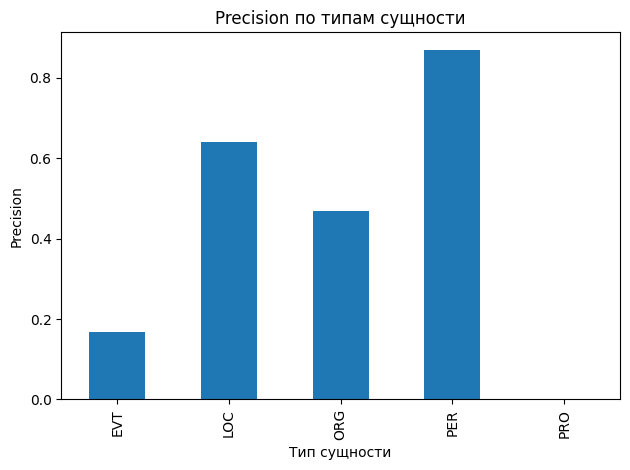

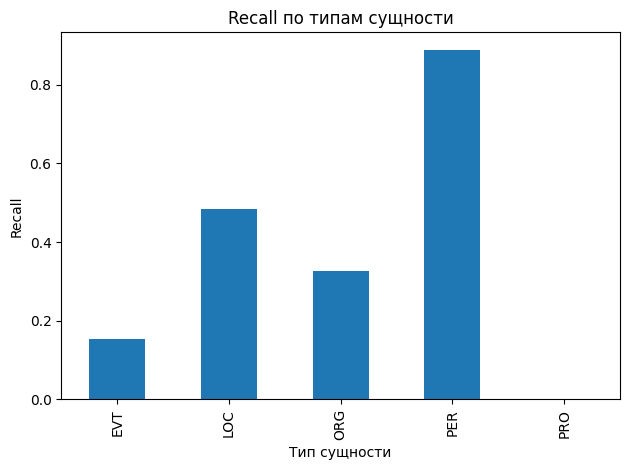

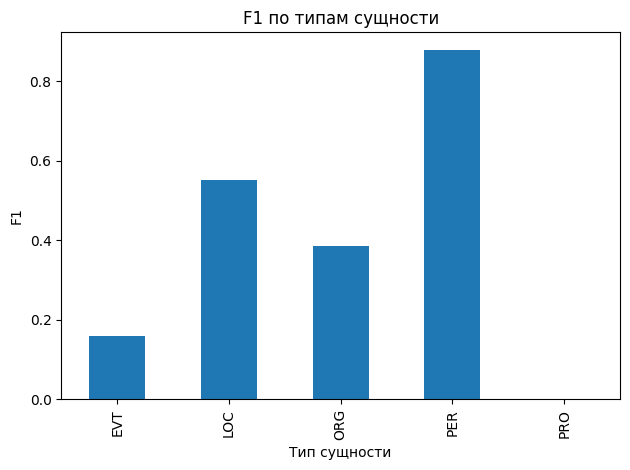

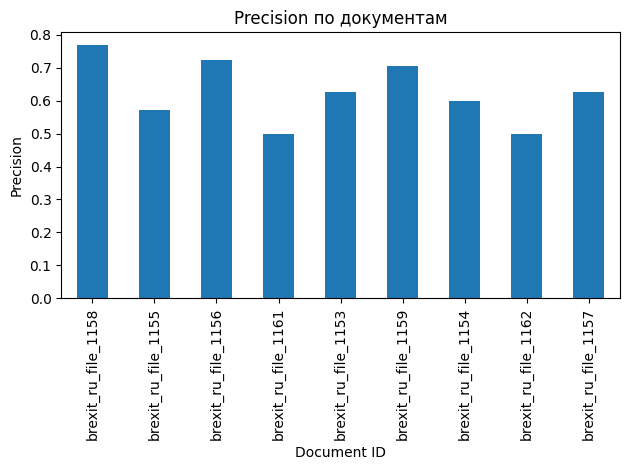

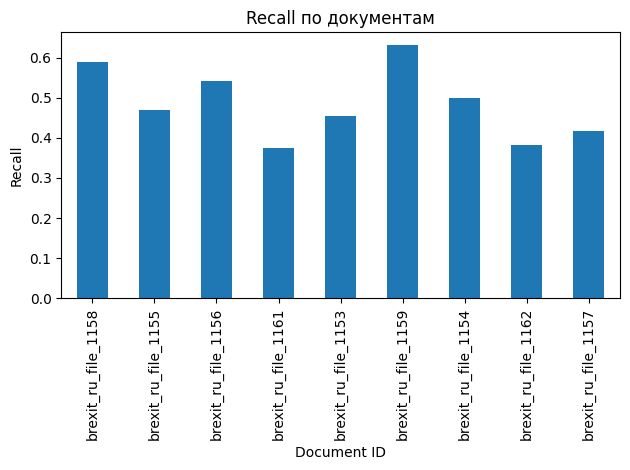

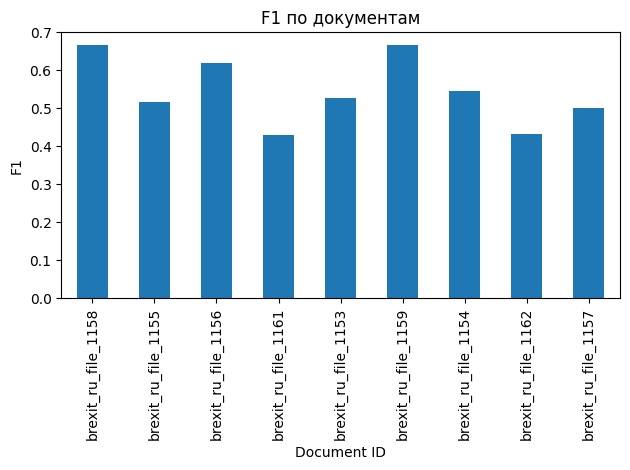

In [74]:
for metric in ['precision','recall','f1']:
    plt.figure()
    etype_metrics[metric].plot(kind='bar')
    plt.title(f'{metric.capitalize()} по типам сущности')
    plt.xlabel('Тип сущности')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()
    plt.show()

df_plot = df.set_index('document_id')
for metric in ['precision','recall','f1']:
    plt.figure()
    df_plot[metric].plot(kind='bar')
    plt.title(f'{metric.capitalize()} по документам')
    plt.xlabel('Document ID')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()
    plt.show()

**Пункт про связь с длинной**

Пока просто рисуем scatter метрики/длина

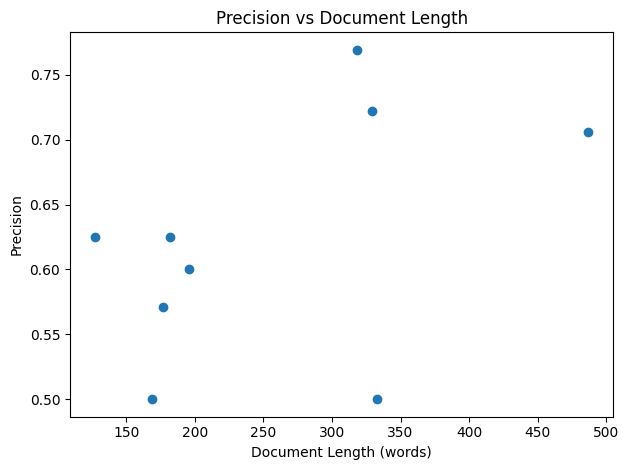

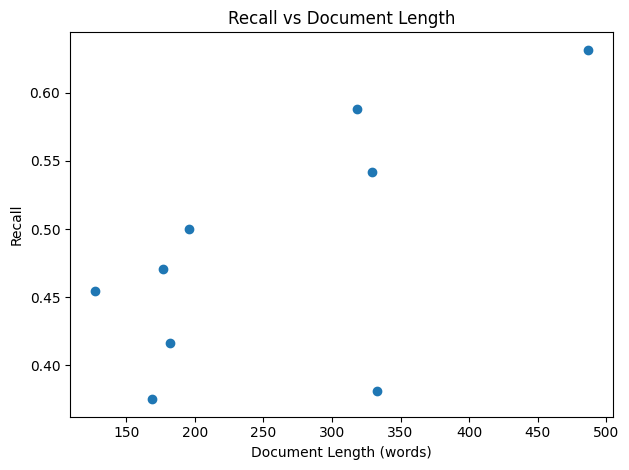

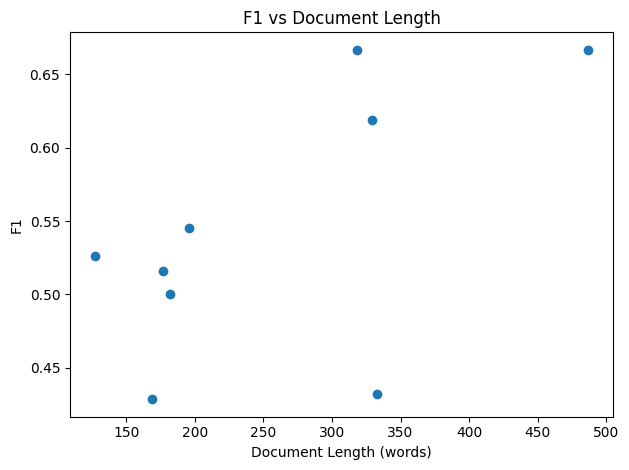

precision    0.474657
recall       0.662327
f1           0.605227
Name: doc_length, dtype: float64


In [75]:
df['doc_length'] = df['document_text'].apply(lambda txt: len(txt.split()))

for metric in ['precision', 'recall', 'f1']:
    plt.figure()
    plt.scatter(df['doc_length'], df[metric])
    plt.title(f'{metric.capitalize()} vs Document Length')
    plt.xlabel('Document Length (words)')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()
    plt.show()


corr = df[['doc_length', 'precision', 'recall', 'f1']].corr()
print(corr['doc_length'][['precision','recall','f1']])


Если не обращать внимание на выброс и учитывая корреляцию видно что чем больше размер документа тем выше метрики

**Вопрос 8**

Смотрим какие именно 'ошибки' в трех наиболее проблемных сущностях.

In [76]:
errors = etype_df[etype_df['type'].isin(['EVT','ORG','PRO'])]\
    .groupby('type')[['TP','FP','FN']].sum()


errors['precision'] = errors['TP'] / (errors['TP'] + errors['FP'])
errors['recall']    = errors['TP'] / (errors['TP'] + errors['FN'])
errors['f1']        = 2 * errors['precision'] * errors['recall'] / (errors['precision'] + errors['recall'])

print(errors[['TP','FP','FN','precision','recall','f1']])


      TP  FP  FN  precision    recall        f1
type                                           
EVT    2  10  11   0.166667  0.153846  0.160000
ORG   15  17  31   0.468750  0.326087  0.384615
PRO    0   0  10        NaN  0.000000       NaN


**Анализ ошибок**

В ходе эксперимента оказалось, что модель демонстрирует следующие характерные ошибки:

*Тип EVT (события)*

-Низкий recall: модель часто пропускает события, упоминаемые косвенно или описательно («дело Скрипалей», «выход из Евросоюза»).

-Низкий precision: иногда модель включает в события общие фразы или абстрактные понятия, неправильно относя их к EVT.

-Пример ошибки: вместо выделения «дело Скрипалей» как события модель либо не маркирует этот фрагмент вообще, либо относит его к LOC/PRO.

*Тип ORG (организации)*

-Модель порой обрезает названия или выделяет неполные имена («Sky» вместо «Sky News», «Никто из серьёзных людей» вместо упоминания конкретного СМИ).

-FP возникают на фоне обобщённых упоминаний («Министерство» без уточнения «иностранных дел»).

-Пример ошибки: «Форин Офис» иногда не распознаётся как ORG, модель оставляет «Офис» или вовсе пропускает.

*Тип PRO (продукты)*

-Самая слабая метрика: PRO почти всегда не распознаётся или распознаётся неверно.

-Модель путает PRO с EVT или ORG, поскольку в тексте «Brexit» и «дело Скрипалей» воспринимаются скорее как события, хотя по разметке некоторые из них относятся к продуктам или процессам (PRO).

-Пример ошибки: «Brexit» и «процедура Brexit» почти всегда помечаются как EVT, хотя часть таких упоминаний должна отнесена к PRO.

**Варианты повышения метрик**
*Нечёткие границы классов:*

-EVT и PRO часто пересекаются: событие – это одноразовое явление, а продукт/процесс может длиться дольше. В промпте можно попробовать добавить чёткие определения и примеры.

*Пост‑обработка:*

-Для ORG использовать шаблоны: если строка содержит «институт», «университет», «компания», «служба», «офис» и рядом с этим название, автоматически помечать как ORG.

-Для EVT/PRO: ключевые глагольные конструкции («подписание», «завершение», «наступление») помогут отделять события от процессов.

*Дообучение на специализированном корпусе* :

-Локальное fine‑tuning модели типа ruBERT‑NER на разметке BSNLP для PRO и EVT улучшит по идеи.